In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from helper_functions import load_expenditure_data, compute_bass_adoption

# Define the file path to the dataset
file_path = "data/statistic_id693303_consumer_smart_home_spending_worldwide_2015_2025.xlsx"

# Load and display the processed data
smart_home_data = load_expenditure_data(path=file_path)
smart_home_data


,Report_Year,Spending_Amount
0,2015,51.0
1,2016,61.0
2,2017,74.0
3,2018,83.0
4,2019,95.0
5,2020,86.0


Predicted values for upcoming 3 years:
Year 6: 80.68
Year 7: 68.92
Year 8: 55.61


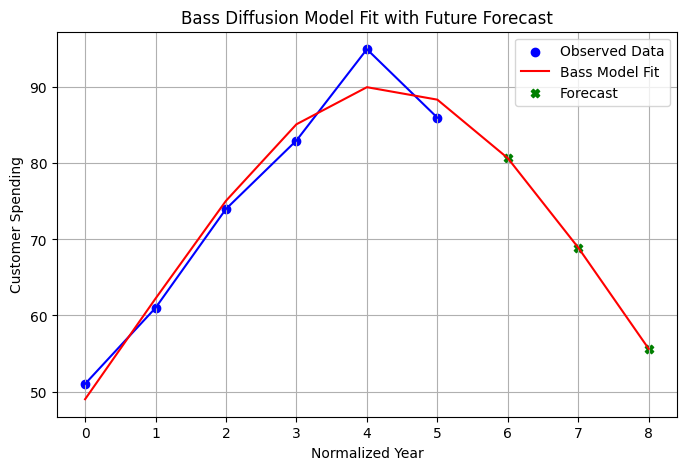

Estimated Parameters:
p (Innovation Rate): 0.0626
q (Imitation Rate): 0.3238
M (Market Potential): 782.61


(np.float64(0.06259520024464638),
 np.float64(0.32384977835634904),
 np.float64(782.6141026883116),
 array([80.67723341, 68.91625322, 55.61186308]))

In [8]:
# Function to fit the Bass model and visualize adoption over time
def fit_and_plot_bass(smart_df: pd.DataFrame):
    """
    Fits the Bass Diffusion Model to customer spending data and visualizes both actual and predicted trends.
    Returns estimated parameters and future values.
    
    Args:
        smart_df (pd.DataFrame): Must contain 'Report_Year' and 'Spending_Amount'
    """
    # Normalize year to start at 0
    smart_df["Report_Year"] = smart_df["Report_Year"] - smart_df["Report_Year"].min()
    
    # Prepare inputs for curve fitting
    time_points = smart_df["Report_Year"].values
    observed_values = smart_df["Spending_Amount"].values
    
    # Initial guess for parameters [p, q, M]
    initial_values = [0.01, 0.1, max(observed_values) * 2]
    
    # Fit the model
    fitted_params, _ = curve_fit(compute_bass_adoption, time_points, observed_values, p0=initial_values, maxfev=10000)
    
    # Unpack fitted parameters
    p_fit, q_fit, market_cap = fitted_params
    
    # Predict future values (extend 3 years beyond current range)
    prediction_range = np.arange(0, max(time_points) + 4)
    predicted_values = compute_bass_adoption(prediction_range, p_fit, q_fit, market_cap)
    
    # Extract future predictions
    future_years = prediction_range[-3:]
    future_estimates = predicted_values[-3:]
    
    print("Predicted values for upcoming 3 years:")
    for year, value in zip(future_years, future_estimates):
        print(f"Year {year}: {value:.2f}")
    
    # Plotting results
    plt.figure(figsize=(8, 5))
    plt.scatter(time_points, observed_values, label="Observed Data", color="blue")
    plt.plot(time_points, observed_values, linestyle="-", color="blue")  # Actual trend line
    plt.plot(prediction_range, predicted_values, label="Bass Model Fit", color="red")
    plt.scatter(future_years, future_estimates, label="Forecast", color="green", marker="X")
    plt.xlabel("Normalized Year")
    plt.ylabel("Customer Spending")
    plt.title("Bass Diffusion Model Fit with Future Forecast")
    plt.legend()
    plt.grid()
    plt.savefig("images/bass_model_fit_and_forecast.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Show parameters
    print("Estimated Parameters:")
    print(f"p (Innovation Rate): {p_fit:.4f}")
    print(f"q (Imitation Rate): {q_fit:.4f}")
    print(f"M (Market Potential): {market_cap:.2f}")
    
    return p_fit, q_fit, market_cap, future_estimates

# Run the model fitting and visualization
fit_and_plot_bass(smart_home_data)



Cumulative adopter estimates:
Year 0: 49 adopters
Year 1: 111 adopters
Year 2: 186 adopters
Year 3: 271 adopters
Year 4: 361 adopters
Year 5: 450 adopters
Year 6: 530 adopters
Year 7: 599 adopters
Year 8: 655 adopters
Year 9: 698 adopters
Year 10: 730 adopters


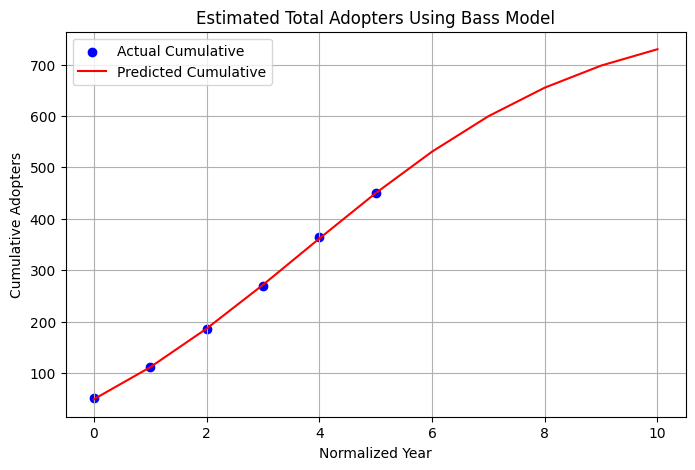

(np.float64(0.06259520024464638),
 np.float64(0.32384977835634904),
 np.float64(782.6141026883116),
 array([ 48.98788647, 111.21267367, 186.28559639, 271.41966926,
        361.42766618, 449.79778302, 530.47501643, 599.39126965,
        655.00313273, 697.85867862, 729.72918081]))

In [7]:
# Function to estimate cumulative adopters over time
def estimate_total_adopters(dataframe, p_val=None, q_val=None, m_val=None):
    time_points = dataframe["Report_Year"].values
    observed_values = dataframe["Spending_Amount"].values
    
    # Fit if parameters are not provided
    if p_val is None or q_val is None or m_val is None:
        default_guess = [0.01, 0.1, max(observed_values) * 2]
        fitted_params, _ = curve_fit(compute_bass_adoption, time_points, observed_values, p0=default_guess, maxfev=10000)
        p_val, q_val, m_val = fitted_params

    # Predict over extended time
    extended_time = np.arange(0, max(time_points) + 6)
    predicted_adoption = compute_bass_adoption(extended_time, p_val, q_val, m_val)

    # Cumulative sum of adopters
    cumulative_adoption = np.cumsum(predicted_adoption)
    
    # Print year-wise cumulative adoption
    print("\nCumulative adopter estimates:")
    for year, total in zip(extended_time, cumulative_adoption):
        print(f"Year {year}: {total:.0f} adopters")
    
    # Visualization
    plt.figure(figsize=(8, 5))
    plt.scatter(time_points, np.cumsum(observed_values), label="Actual Cumulative", color="blue")
    plt.plot(extended_time, cumulative_adoption, label="Predicted Cumulative", color="red")
    plt.xlabel("Normalized Year")
    plt.ylabel("Cumulative Adopters")
    plt.title("Estimated Total Adopters Using Bass Model")
    plt.legend()
    plt.grid()
    plt.savefig("images/bass_model_adopters.png", dpi=300, bbox_inches="tight")
    plt.show()

    return p_val, q_val, m_val, cumulative_adoption

# Run cumulative adoption estimation
estimate_total_adopters(smart_home_data)
